# ***Credit Card Fraud Detection***
## Anonymized credit card transactions labeled as fraudulent or genuine

### Context
It is important that credit card companies are able to recognize fraudulent credit card transactions so that customers are not charged for items that they did not purchase.

### Content
The dataset contains transactions made by credit cards in September 2013 by European cardholders.
This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

It contains only numerical input variables which are the result of a PCA transformation. 
Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. 
Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. 
Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. 
The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-sensitive learning. 
Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

Given the class imbalance ratio, we recommend measuring the accuracy using the Area Under the Precision-Recall Curve (AUPRC). 
Confusion matrix accuracy is not meaningful for unbalanced classification.

### Update (03/05/2021)
A simulator for transaction data has been released as part of the practical handbook on Machine Learning for Credit Card Fraud Detection - https://fraud-detection-handbook.github.io/fraud-detection-handbook/Chapter_3_GettingStarted/SimulatedDataset.html. 
We invite all practitioners interested in fraud detection datasets to also check out this data simulator, and the methodologies for credit card fraud detection presented in the book.

### Acknowledgements
The dataset has been collected and analysed during a research collaboration of Worldline and the Machine Learning Group (http://mlg.ulb.ac.be) of ULB (Université Libre de Bruxelles) on big data mining and fraud detection.
More details on current and past projects on related topics are available on https://www.researchgate.net/project/Fraud-detection-5 and the page of the DefeatFraud project

Please cite the following works:

Andrea Dal Pozzolo, Olivier Caelen, Reid A. Johnson and Gianluca Bontempi. Calibrating Probability with Undersampling for Unbalanced Classification. In Symposium on Computational Intelligence and Data Mining (CIDM), IEEE, 2015

Dal Pozzolo, Andrea; Caelen, Olivier; Le Borgne, Yann-Ael; Waterschoot, Serge; Bontempi, Gianluca. Learned lessons in credit card fraud detection from a practitioner perspective, Expert systems with applications,41,10,4915-4928,2014, Pergamon

Dal Pozzolo, Andrea; Boracchi, Giacomo; Caelen, Olivier; Alippi, Cesare; Bontempi, Gianluca. Credit card fraud detection: a realistic modeling and a novel learning strategy, IEEE transactions on neural networks and learning systems,29,8,3784-3797,2018,IEEE

Dal Pozzolo, Andrea Adaptive Machine learning for credit card fraud detection ULB MLG PhD thesis (supervised by G. Bontempi)

Carcillo, Fabrizio; Dal Pozzolo, Andrea; Le Borgne, Yann-Aël; Caelen, Olivier; Mazzer, Yannis; Bontempi, Gianluca. Scarff: a scalable framework for streaming credit card fraud detection with Spark, Information fusion,41, 182-194,2018,Elsevier

Carcillo, Fabrizio; Le Borgne, Yann-Aël; Caelen, Olivier; Bontempi, Gianluca. Streaming active learning strategies for real-life credit card fraud detection: assessment and visualization, International Journal of Data Science and Analytics, 5,4,285-300,2018,Springer International Publishing

Bertrand Lebichot, Yann-Aël Le Borgne, Liyun He, Frederic Oblé, Gianluca Bontempi Deep-Learning Domain Adaptation Techniques for Credit Cards Fraud Detection, INNSBDDL 2019: Recent Advances in Big Data and Deep Learning, pp 78-88, 2019

Fabrizio Carcillo, Yann-Aël Le Borgne, Olivier Caelen, Frederic Oblé, Gianluca Bontempi Combining Unsupervised and Supervised Learning in Credit Card Fraud Detection Information Sciences, 2019

Yann-Aël Le Borgne, Gianluca Bontempi Machine Learning for Credit Card Fraud Detection - Practical Handbook

## Importing the main libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('creditcard.csv')
data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [3]:
data.shape

(284807, 31)

#### This dataset contains 284,807 transactions

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

#### No missing values in the dataset.
#### All attributes have proper data type.

## Isolating data of interest

In [5]:
df = data.loc[:, ['Time', 'Amount', 'Class']]
df.head()

,Time,Amount,Class
0,0.0,149.62,0
1,0.0,2.69,0
2,1.0,378.66,0
3,1.0,123.50,0
4,2.0,69.99,0


# Exploratory Data Analysis

In [6]:
df.describe()

,Time,Amount,Class
count,284807.000000,284807.000000,284807.000000
mean,94813.859575,88.349619,0.001727
std,47488.145955,250.120109,0.041527
min,0.000000,0.000000,0.000000
25%,54201.500000,5.600000,0.000000
50%,84692.000000,22.000000,0.000000
75%,139320.500000,77.165000,0.000000
max,172792.000000,25691.160000,1.000000


In [7]:
print(df.Class.value_counts())
print(f"Fraudulent Transaction Percent of Total: {np.round(df.Class.value_counts()[1] / df.Class.count() * 100, 2)}%")

0    284315
1       492
Name: Class, dtype: int64
Fraudulent Transaction Percent of Total: 0.17%


#### The dataset is highly imbalanced, with less than 1% of the rows being fraudulent transactions.

In [8]:
df.groupby('Class').describe().T

Class                     0              1
Time   count  284315.000000     492.000000
       mean    94838.202258   80746.806911
       std     47484.015786   47835.365138
       min         0.000000     406.000000
       25%     54230.000000   41241.500000
       50%     84711.000000   75568.500000
       75%    139333.000000  128483.000000
       max    172792.000000  170348.000000
Amount count  284315.000000     492.000000
       mean       88.291022     122.211321
       std       250.105092     256.683288
       min         0.000000       0.000000
       25%         5.650000       1.000000
       50%        22.000000       9.250000
       75%        77.050000     105.890000
       max     25691.160000    2125.870000

## Creating a new column from the column "Time" (in seconds) in days/hours/minutes/seconds format

In [9]:
df['Days'] = pd.to_timedelta(df['Time'], unit='s')
df

,Time,Amount,Class,Days
0,0.0,149.62,0,0 days 00:00:00
1,0.0,2.69,0,0 days 00:00:00
2,1.0,378.66,0,0 days 00:00:01
3,1.0,123.50,0,0 days 00:00:01
4,2.0,69.99,0,0 days 00:00:02
...,...,...,...,...
284802,172786.0,0.77,0,1 days 23:59:46
284803,172787.0,24.79,0,1 days 23:59:47
284804,172788.0,67.88,0,1 days 23:59:48
284805,172788.0,10.00,0,1 days 23:59:48


#### This dataset consists of transactions spanning two days total.

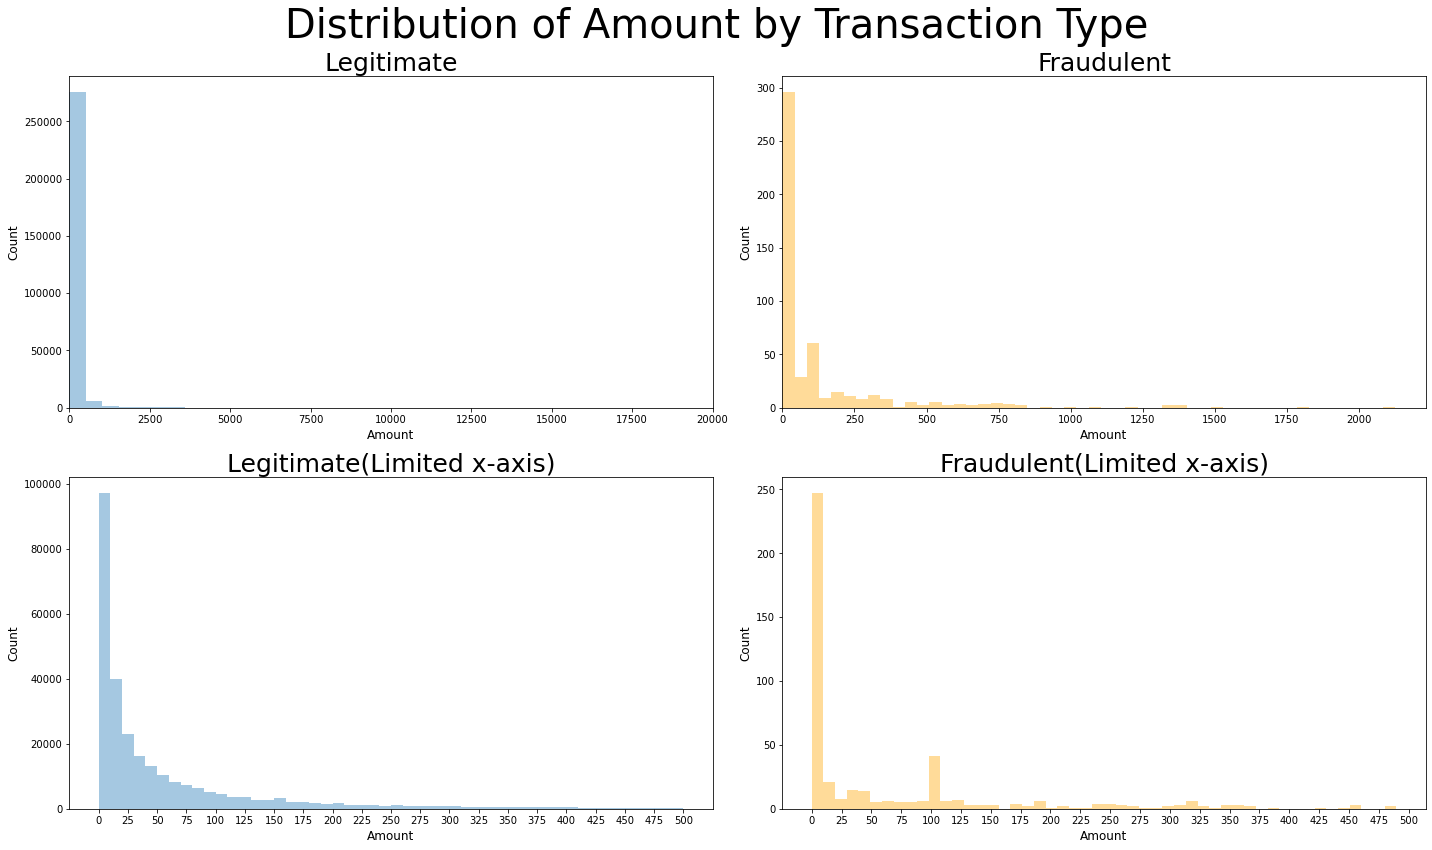

In [10]:
fig, ax = plt.subplots(2,2,figsize=(20,12))
sns.distplot(df.loc[df['Class'] == 0]['Amount'], ax=ax[0,0], kde=False, bins=50)
ax[0,0].set_xlabel('Amount', fontsize=12)
ax[0,0].set_ylabel('Count', fontsize=12)
ax[0,0].set_title('Legitimate', fontsize=25)
ax[0,0].set_xlim(0,20000)
ax[0,0].set
sns.distplot(df.loc[df['Class'] == 1]['Amount'], ax=ax[0,1], kde=False, bins=50, color='orange')
ax[0,1].set_xlabel('Amount', fontsize=12)
ax[0,1].set_ylabel('Count', fontsize=12)
ax[0,1].set_title('Fraudulent', fontsize=25)
ax[0,1].set_xlim(left=0)
sns.distplot(df.loc[(df['Class'] == 0) & (df['Amount'] < 500)]['Amount'], ax=ax[1,0], kde=False, bins=50)
ax[1,0].set_xlabel('Amount', fontsize=12)
ax[1,0].set_ylabel('Count', fontsize=12)
ax[1,0].set_title('Legitimate(Limited x-axis)', fontsize=25)
ax[1,0].set_xticks(np.arange(0,501,25))
sns.distplot(df.loc[(df['Class'] == 1) & (df['Amount'] < 500)]['Amount'], ax=ax[1,1], kde=False, bins=50, color='orange')
ax[1,1].set_xlabel('Amount', fontsize=12)
ax[1,1].set_ylabel('Count', fontsize=12)
ax[1,1].set_title('Fraudulent(Limited x-axis)', fontsize=25)
ax[1,1].set_xticks(np.arange(0,501,25))
fig.suptitle('Distribution of Amount by Transaction Type', fontsize=40)
plt.tight_layout()
plt.show()

#### The vast majority of these transactions are $25 or below for both legitimate and fraudulent transactions.

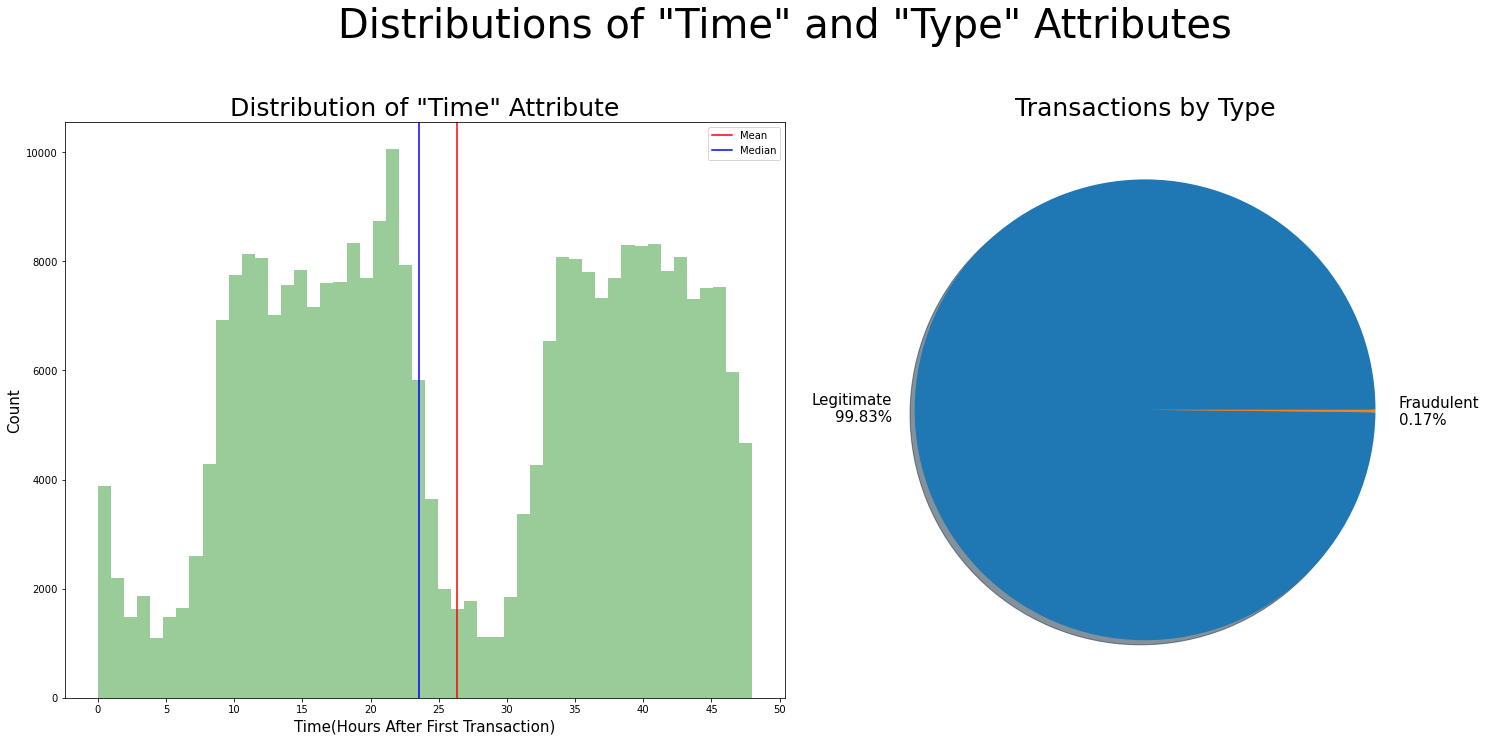

In [11]:
fig = plt.figure(figsize=(10,8))
ax1 = fig.add_axes([0,0,1,1])
sns.distplot(df['Time']/60/60, kde=False, color='green', ax=ax1)
ax1.set_title('Distribution of "Time" Attribute', fontsize=25)
ax1.set_xlabel('Time(Hours After First Transaction)', fontsize=15)
ax1.set_ylabel('Count', fontsize=15)
ax1.axvline((df['Time']/60/60).mean(), label='Mean', color='red')
ax1.axvline((df['Time']/60/60).median(), label='Median', color='blue')
ax1.set_xticks(np.arange(0,51,5))
ax1.legend()
ax2 = fig.add_axes([1,0,1,1])
plt.pie(df.groupby('Class').size(), labels=['Legitimate\n99.83%', 'Fraudulent\n0.17%'], textprops={'fontsize':15}, shadow=True)
ax2.set_title('Transactions by Type', fontsize=25)
fig.suptitle('Distributions of "Time" and "Type" Attributes', fontsize=40, x=1, y=1.2)
plt.show()

#### The distribution of the "Time" attribute is bimodal.
#### The vast majority of transactions in the dataset are legitimate.

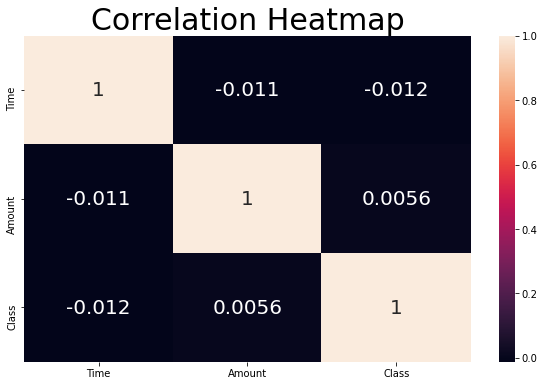

In [12]:
plt.figure(figsize=(10,6))
plt.title('Correlation Heatmap', fontsize=30)
sns.heatmap(df.corr(), annot=True, annot_kws={'fontsize': 20})
plt.show()

#### The correlation between these three attributes is very low with each combination.

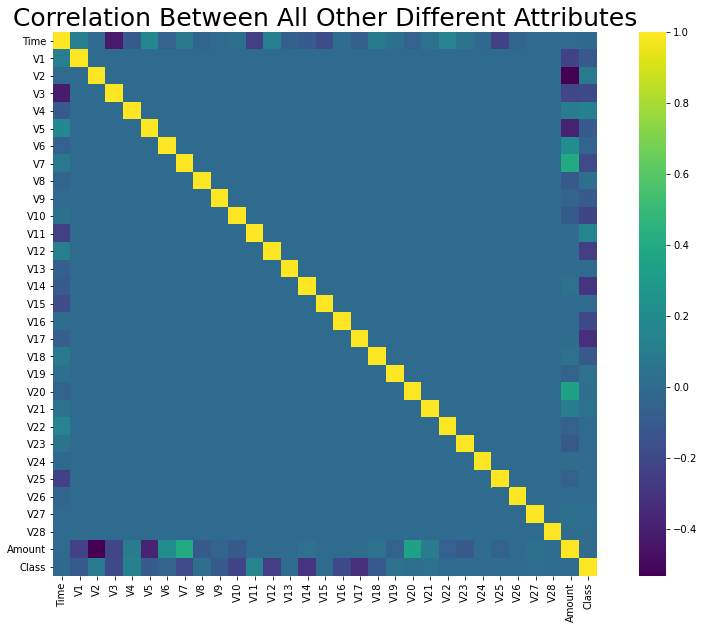

In [13]:
plt.figure(figsize=(15,10))

sns.heatmap(data.corr(), vmax=1, square=True,cmap='viridis')
plt.title('Correlation Between All Other Different Attributes', fontsize=25)
plt.show()

# Preparing our Data For Model Building

In [14]:
from sklearn.model_selection import train_test_split
X = data.drop('Class', axis=1)
y = data['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

In [15]:
# Concatenate our training data back together
X = pd.concat([X_train, y_train], axis=1)
X.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
260755,159708.0,-0.459482,1.198230,2.315423,4.274698,0.603004,2.280395,0.026612,0.564397,-1.726571,...,-0.351269,-0.906878,-0.131385,0.050282,0.029694,0.144998,0.114877,0.093615,27.23,0
191155,129139.0,1.878563,0.020785,-1.621113,2.908813,2.507847,4.709442,-0.830626,1.136154,-0.395755,...,0.079998,0.404327,0.121098,0.707538,0.140100,0.155684,0.016375,-0.053892,0.00,0
4791,4263.0,-1.467414,1.210542,1.891733,-0.282189,-0.214526,-0.201625,1.547764,-0.284276,0.907166,...,-0.039093,0.097313,-0.302656,0.320926,0.586090,-0.631388,-0.298853,0.016153,153.00,0
159931,113041.0,2.073474,-0.147624,-1.495803,0.184499,0.107505,-0.858107,0.046284,-0.179913,0.984100,...,0.250739,0.802850,0.034933,0.655414,0.289638,-0.442057,-0.003265,-0.051052,1.00,0
124588,77352.0,1.097497,0.357207,1.051187,2.631217,-0.464023,-0.006905,-0.183556,0.166381,-0.456974,...,-0.232654,-0.626643,0.106893,0.486223,0.296727,-0.207474,0.001507,0.016926,3.93,0


# Using Dummy Classifier to Verify the Imbalanced Data Output

In [16]:
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
dummy = DummyClassifier(strategy='most_frequent')
dummy.fit(X_train, y_train)
dummy_pred = dummy.predict(X_test)

# Checking unique labels
print(f"Unique Predicted Labels: {np.unique(dummy_pred)}")

# Checking accuracy
print(f"Test Score: {accuracy_score(y_test, dummy_pred)}")

Unique Predicted Labels: [0]
Test Score: 0.9984410550265442


#### Due to the data imbalance, any algorithm that we might use to classify the data will likely output 0 for every entry.

# Oversampling

In [17]:
from sklearn.utils import resample
not_fraud = X[X.Class == 0]
fraud = X[X.Class == 1]

# Upsample minority
fraud_oversampled = resample(fraud, replace=True, # Sample with replacement
                           n_samples=len(not_fraud), # Match number in majority class
                           random_state=1)

# Combine majority and unsamples minority
oversampled = pd.concat([not_fraud, fraud_oversampled])

# Check new class counts
oversampled.Class.value_counts()

0    213224
1    213224
Name: Class, dtype: int64

In [18]:
def print_metrics(pred, test=y_test):
    print(f"{'='*55}\n\n{'-'*55}\nAccuracy Score: {accuracy_score(test, pred)}\n{'-'*55}")
    print(f"{'*'*55}\nClassification Report\n{classification_report(test, pred)}\n{'*'*55}")
    print('Confusion Matrix')
    print(pd.DataFrame(confusion_matrix(test, pred), columns=['Predicted 0', 'Predicted 1'], index=['Actual 0', 'Actual 1']))
    print('='*55)

In [19]:
from sklearn.linear_model import LogisticRegression
X_train = oversampled.drop('Class', axis=1)
y_train = oversampled['Class']
# Trying Logistic Regression with the balanced dataset
oversampled_lr = LogisticRegression(solver='liblinear')
oversampled_lr.fit(X_train, y_train)
oversampled_pred = oversampled_lr.predict(X_test)

print_metrics(oversampled_pred)


-------------------------------------------------------
Accuracy Score: 0.9745231875509115
-------------------------------------------------------
*******************************************************
Classification Report
              precision    recall  f1-score   support

           0       1.00      0.97      0.99     71091
           1       0.05      0.86      0.10       111

    accuracy                           0.97     71202
   macro avg       0.53      0.92      0.54     71202
weighted avg       1.00      0.97      0.99     71202

*******************************************************
Confusion Matrix
          Predicted 0  Predicted 1
Actual 0        69292         1799
Actual 1           15           96


#### After oversampling, the model is still underperforming significantly when it comes to predicting fraudulent transactions.

# Undersampling

In [20]:
# Still using our separated classes fraud and not_fraud from above

# Downsample majority
not_fraud_undersampled = resample(not_fraud, replace=False, # Sample without replacement
                                 n_samples=len(fraud), # Match minority n
                                 random_state=1)

# Combine minority and downsampled majority
undersampled = pd.concat([not_fraud_undersampled, fraud])
undersampled.Class.value_counts()

0    381
1    381
Name: Class, dtype: int64

In [21]:
# Trying Logistic Regression with the undersampled dataset
X_train = undersampled.drop('Class', axis=1)
y_train = undersampled['Class']

undersampled_lr = LogisticRegression(solver='liblinear')
undersampled_lr.fit(X_train, y_train)
undersampled_pred = undersampled_lr.predict(X_test)

print_metrics(undersampled_pred)


-------------------------------------------------------
Accuracy Score: 0.9784977950057583
-------------------------------------------------------
*******************************************************
Classification Report
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     71091
           1       0.06      0.85      0.11       111

    accuracy                           0.98     71202
   macro avg       0.53      0.91      0.55     71202
weighted avg       1.00      0.98      0.99     71202

*******************************************************
Confusion Matrix
          Predicted 0  Predicted 1
Actual 0        69577         1514
Actual 1           17           94


#### After undersampling, the model is still underperforming with fraudulent transactions.

# Generate Synthetic Samples
### SMOTE (Synthetic Minority Oversampling Technique): A popular algorithm that creates synthetic observations of the minority class.

In [22]:
#! pip install -U imbalanced-learn
from imblearn.over_sampling import SMOTE

In [23]:
# Separate input features and target
X = data.drop('Class', axis=1)
y = data['Class']

X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, test_size=0.25, random_state=1)

In [24]:
print(f"Before:\n{y_train1.value_counts()}")
sm = SMOTE(random_state=1)
X_train1, y_train1 = sm.fit_resample(X_train1, y_train1)
print(f"After:\n{y_train1.value_counts()}")

Before:
0    213224
1       381
Name: Class, dtype: int64
After:
0    213224
1    213224
Name: Class, dtype: int64


In [25]:
smote_lr = LogisticRegression(solver='liblinear')
smote_lr.fit(X_train1, y_train1)
smote_pred = smote_lr.predict(X_test)

print_metrics(smote_pred)


-------------------------------------------------------
Accuracy Score: 0.986657678155108
-------------------------------------------------------
*******************************************************
Classification Report
              precision    recall  f1-score   support

           0       1.00      0.99      0.99     71091
           1       0.09      0.83      0.16       111

    accuracy                           0.99     71202
   macro avg       0.54      0.91      0.58     71202
weighted avg       1.00      0.99      0.99     71202

*******************************************************
Confusion Matrix
          Predicted 0  Predicted 1
Actual 0        70160          931
Actual 1           19           92


#### Out of the three above methods, under seems to have the highest precision when it comes to correctly classifying fraudulent transactions.

In [26]:
#X_train = oversampled.drop('Class', axis=1)
#y_train = oversampled['Class']

# Random Forest Classifier

In [27]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=10)
rfc.fit(X_train, y_train)
rfc_pred = rfc.predict(X_test)

print_metrics(rfc_pred)


-------------------------------------------------------
Accuracy Score: 0.9826268925030196
-------------------------------------------------------
*******************************************************
Classification Report
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     71091
           1       0.07      0.85      0.13       111

    accuracy                           0.98     71202
   macro avg       0.54      0.91      0.56     71202
weighted avg       1.00      0.98      0.99     71202

*******************************************************
Confusion Matrix
          Predicted 0  Predicted 1
Actual 0        69871         1220
Actual 1           17           94


# Naive Bayes Classifier

In [28]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)
gnb_pred = gnb.predict(X_test)
print_metrics(gnb_pred)


-------------------------------------------------------
Accuracy Score: 0.9903092609758153
-------------------------------------------------------
*******************************************************
Classification Report
              precision    recall  f1-score   support

           0       1.00      0.99      1.00     71091
           1       0.11      0.69      0.18       111

    accuracy                           0.99     71202
   macro avg       0.55      0.84      0.59     71202
weighted avg       1.00      0.99      0.99     71202

*******************************************************
Confusion Matrix
          Predicted 0  Predicted 1
Actual 0        70435          656
Actual 1           34           77


# Support Vector Classifier

In [29]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
svc = SVC(kernel='rbf', probability=True)
params = {'C':[0.1, 0.5, 0.7, 1], 'gamma': ['auto', 'scale', 0.001, 0.1, 0.5]}
grid = GridSearchCV(estimator=svc, param_grid=params, scoring='roc_auc', verbose=10, n_jobs=-1)
grid.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


GridSearchCV(estimator=SVC(probability=True), n_jobs=-1,
             param_grid={'C': [0.1, 0.5, 0.7, 1],
                         'gamma': ['auto', 'scale', 0.001, 0.1, 0.5]},
             scoring='roc_auc', verbose=10)

In [30]:
print(f"Best Parameters: {grid.best_params_}")
grid_pred = grid.predict(X_test)
print_metrics(grid_pred)

Best Parameters: {'C': 1, 'gamma': 0.001}

-------------------------------------------------------
Accuracy Score: 0.9433723771804163
-------------------------------------------------------
*******************************************************
Classification Report
              precision    recall  f1-score   support

           0       1.00      0.94      0.97     71091
           1       0.01      0.21      0.01       111

    accuracy                           0.94     71202
   macro avg       0.50      0.58      0.49     71202
weighted avg       1.00      0.94      0.97     71202

*******************************************************
Confusion Matrix
          Predicted 0  Predicted 1
Actual 0        67147         3944
Actual 1           88           23


# Plotting ROC-AUC Curve for Model Performance Comparison

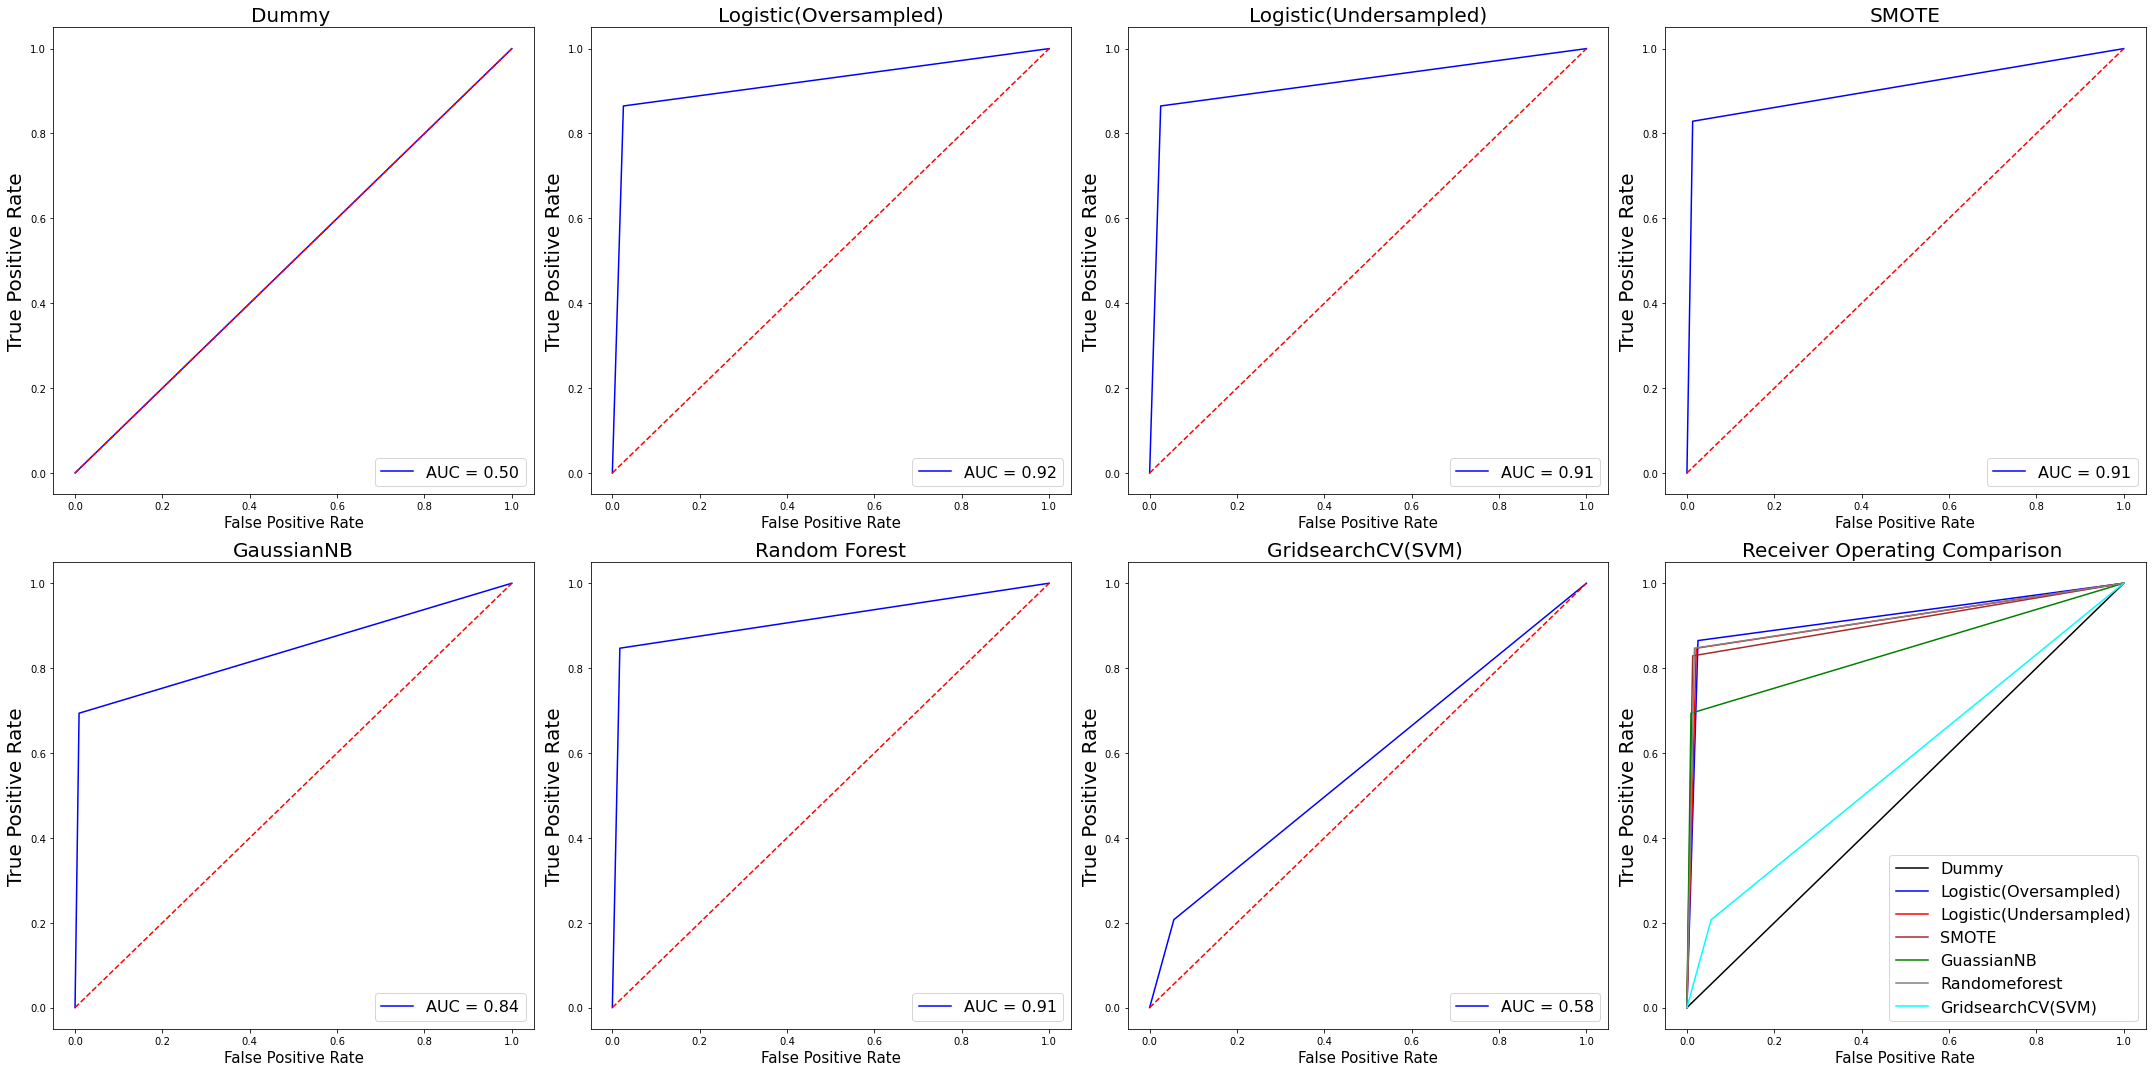

In [31]:
from sklearn.metrics import roc_curve, auc
fig, ax = plt.subplots(nrows = 2, ncols = 4, figsize = (30,15))


#----------Dummy---------


dummy_pred = dummy.predict(X_test)
fprdm, tprdm, thresholddm = roc_curve(y_test,dummy_pred)
roc_aucxgb = auc(fprdm,tprdm)

ax[0,0].plot(fprdm,  tprdm, 'b', label = 'AUC = %0.2f' % roc_aucxgb)
ax[0,0].plot([0, 1], [0, 1],'r--')
ax[0,0].set_title('Dummy ',fontsize=20)
ax[0,0].set_ylabel('True Positive Rate',fontsize=20)
ax[0,0].set_xlabel('False Positive Rate',fontsize=15)
ax[0,0].legend(loc = 'lower right', prop={'size': 16})

#----------Logistics---------

oversampled_pred = oversampled_lr.predict(X_test)
fprlog, tprlog, thresholdlog = roc_curve(y_test, oversampled_pred)
roc_aucxgb = auc(fprlog, tprlog)

ax[0,1].plot(fprlog, tprlog, 'b', label = 'AUC = %0.2f' % roc_aucxgb)
ax[0,1].plot([0, 1], [0, 1],'r--')
ax[0,1].set_title('Logistic(Oversampled)',fontsize=20)
ax[0,1].set_ylabel('True Positive Rate',fontsize=20)
ax[0,1].set_xlabel('False Positive Rate',fontsize=15)
ax[0,1].legend(loc = 'lower right', prop={'size': 16})
#----------Logistics---------

undersampled_pred = undersampled_lr.predict(X_test)
fprlog2, tprlog2, thresholdlog2 = roc_curve(y_test, undersampled_pred)
roc_aucxgb = auc(fprlog2, tprlog2)

ax[0,2].plot(fprlog, tprlog, 'b', label = 'AUC = %0.2f' % roc_aucxgb)
ax[0,2].plot([0, 1], [0, 1],'r--')
ax[0,2].set_title('Logistic(Undersampled)',fontsize=20)
ax[0,2].set_ylabel('True Positive Rate',fontsize=20)
ax[0,2].set_xlabel('False Positive Rate',fontsize=15)
ax[0,2].legend(loc = 'lower right', prop={'size': 16})


#----------SMOTE---------


smote_pred = smote_lr.predict(X_test1)
#preds = probs[:,1]
fprsm, tprsm, thresholdsm = roc_curve(y_test, smote_pred)
roc_aucxgb = auc(fprsm, tprsm)


ax[0,3].plot(fprsm, tprsm, 'b', label = 'AUC = %0.2f' % roc_aucxgb)
ax[0,3].plot([0, 1], [0, 1],'r--')
ax[0,3].set_title('SMOTE',fontsize=20)
ax[0,3].set_ylabel('True Positive Rate',fontsize=20)
ax[0,3].set_xlabel('False Positive Rate',fontsize=15)
ax[0,3].legend(loc = 'lower right', prop={'size': 16})



#----------GaussianNB---------

gnb_pred = gnb.predict(X_test)
#preds = probs[:,1]
fprgnb, tprgnb, thresholdgnd = roc_curve(y_test, gnb_pred)
roc_aucxgb = auc(fprgnb, tprgnb)


ax[1,0].plot(fprgnb, tprgnb, 'b', label = 'AUC = %0.2f' % roc_aucxgb)
ax[1,0].plot([0, 1], [0, 1],'r--')
ax[1,0].set_title('GaussianNB',fontsize=20)
ax[1,0].set_ylabel('True Positive Rate',fontsize=20)
ax[1,0].set_xlabel('False Positive Rate',fontsize=15)
ax[1,0].legend(loc = 'lower right', prop={'size': 16})


#----------Random Forest---------


randf_pred = rfc.predict(X_test)
#preds = probs[:,1]
fprfst, tprfst, thresholdfst = roc_curve(y_test, randf_pred)
roc_aucxgb = auc(fprfst, tprfst)


ax[1,1].plot(fprfst, tprfst, 'b', label = 'AUC = %0.2f' % roc_aucxgb)
ax[1,1].plot([0, 1], [0, 1],'r--')
ax[1,1].set_title('Random Forest',fontsize=20)
ax[1,1].set_ylabel('True Positive Rate',fontsize=20)
ax[1,1].set_xlabel('False Positive Rate',fontsize=15)
ax[1,1].legend(loc = 'lower right', prop={'size': 16})


#----------GridsearchCV(SVM)---------


grid_pred = grid.predict(X_test)
fprgsv, tprgsv, thresholdgsv = roc_curve(y_test, grid_pred )
roc_aucxgb = auc(fprgsv,  tprgsv)


ax[1,2].plot(fprgsv,  tprgsv, 'b', label = 'AUC = %0.2f' % roc_aucxgb)
ax[1,2].plot([0, 1], [0, 1],'r--')
ax[1,2].set_title('GridsearchCV(SVM) ',fontsize=20)
ax[1,2].set_ylabel('True Positive Rate',fontsize=20)
ax[1,2].set_xlabel('False Positive Rate',fontsize=15)
ax[1,2].legend(loc = 'lower right', prop={'size': 16})


#----------ALL---------


ax[1,3].plot(fprdm, tprdm, 'b', label = 'Dummy', color='black')
ax[1,3].plot(fprlog, tprlog, 'b', label = 'Logistic(Oversampled)', color='blue')
ax[1,3].plot(fprlog2, tprlog2, 'b', label = 'Logistic(Undersampled)', color='red')
ax[1,3].plot(fprsm, tprsm, 'b', label = 'SMOTE', color='brown')
ax[1,3].plot(fprgnb, tprgnb, 'b', label = 'GuassianNB', color='green')
ax[1,3].plot(fprfst, tprfst, 'b', label = 'Randomeforest', color='grey')
ax[1,3].plot(fprgsv,  tprgsv, 'b', label = 'GridsearchCV(SVM)', color='cyan')
ax[1,3].set_title('Receiver Operating Comparison ',fontsize=20)
ax[1,3].set_ylabel('True Positive Rate',fontsize=20)
ax[1,3].set_xlabel('False Positive Rate',fontsize=15)
ax[1,3].legend(loc = 'lower right', prop={'size': 16})
plt.tight_layout()
plt.style.use('ggplot')
plt.show()